In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
import os
import csv

In [2]:
x_tr = pd.read_csv('data/x_train.csv')
y_tr = pd.read_csv('data/y_train.csv')

In [ ]:
x_tr.shape

(328135, 321)

In [ ]:
x_tr.head()

,Id,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,0,53,11,11162015,11,16,2015,1100,2015015629,2015015629,...,1,1,3.0,3.0,4.0,1,1,NaN,NaN,2.0
1,1,33,12,12152015,12,15,2015,1200,2015004387,2015004387,...,9,9,3.0,3.0,4.0,9,9,NaN,NaN,NaN
2,2,20,10,10202015,10,20,2015,1100,2015005638,2015005638,...,4,2,2.0,2.0,3.0,1,1,1.0,2.0,2.0
3,3,42,6,6182015,6,18,2015,1100,2015004694,2015004694,...,2,2,2.0,2.0,3.0,1,1,2.0,2.0,2.0
4,4,24,11,11062015,11,6,2015,1100,2015004673,2015004673,...,9,9,3.0,3.0,4.0,1,1,9.0,9.0,2.0


In [ ]:
list(x_tr.columns)

['_STATE',
 'FMONTH',
 'IDATE',
 'IMONTH',
 'IDAY',
 'IYEAR',
 'DISPCODE',
 'SEQNO',
 '_PSU',
 'CTELENUM',
 'PVTRESD1',
 'COLGHOUS',
 'STATERES',
 'CELLFON3',
 'LADULT',
 'NUMADULT',
 'NUMMEN',
 'NUMWOMEN',
 'CTELNUM1',
 'CELLFON2',
 'CADULT',
 'PVTRESD2',
 'CCLGHOUS',
 'CSTATE',
 'LANDLINE',
 'HHADULT',
 'GENHLTH',
 'PHYSHLTH',
 'MENTHLTH',
 'POORHLTH',
 'HLTHPLN1',
 'PERSDOC2',
 'MEDCOST',
 'CHECKUP1',
 'BPHIGH4',
 'BPMEDS',
 'BLOODCHO',
 'CHOLCHK',
 'TOLDHI2',
 'CVDSTRK3',
 'ASTHMA3',
 'ASTHNOW',
 'CHCSCNCR',
 'CHCOCNCR',
 'CHCCOPD1',
 'HAVARTH3',
 'ADDEPEV2',
 'CHCKIDNY',
 'DIABETE3',
 'DIABAGE2',
 'SEX',
 'MARITAL',
 'EDUCA',
 'RENTHOM1',
 'NUMHHOL2',
 'NUMPHON2',
 'CPDEMO1',
 'VETERAN3',
 'EMPLOY1',
 'CHILDREN',
 'INCOME2',
 'INTERNET',
 'WEIGHT2',
 'HEIGHT3',
 'PREGNANT',
 'QLACTLM2',
 'USEEQUIP',
 'BLIND',
 'DECIDE',
 'DIFFWALK',
 'DIFFDRES',
 'DIFFALON',
 'SMOKE100',
 'SMOKDAY2',
 'STOPSMK2',
 'LASTSMK2',
 'USENOW3',
 'ALCDAY5',
 'AVEDRNK2',
 'DRNK3GE5',
 'MAXDRNKS',
 'FRUITJU

In [ ]:
list(x_tr.dtypes)

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 

In [3]:
intresting_features=["GENHLTH","POORHLTH","HLTHPLN1","CHECKUP1","BPMEDS","TOLDHI2","CVDSTRK3"]

In [4]:
dico_transfos={"GENHLTH":{7:4,9:4},"POORHLTH":{88:0,77:0,99:0},"HLTHPLN1":{1:1, 2:0,7:0.5,9:0},"CHECKUP1":{1:1,2:2,3:3,4:4,8:15,7:0.5,9:0},"BPMEDS":{1:1,2:0,7:0.5,9:0},"TOLDHI2":{1:1,2:0,7:0.5,9:0},
               "CVDCRHD4":{1:1,2:0,7:0.5,9:0} ,
               "CVDSTRK3":{1:1,2:0,7:0.5,9:0}}

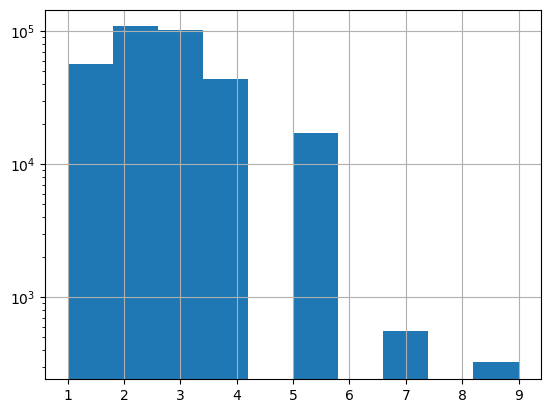

In [ ]:
x_tr["GENHLTH"].hist()
plt.yscale("log")

In [5]:
for col in intresting_features:
    x_tr[col].replace(dico_transfos[col],inplace=True)

In [7]:
x_tr_cleaned=x_tr.fillna(0)[intresting_features]

In [8]:
x_tr_cleaned.shape

(328135, 7)

In [9]:
x_tra, x_val, y_tra, y_val=split_data(x_tr_cleaned.values,y_tr.values.ravel(),ratio=0.75,seed=69)

### Simple linear model

In [10]:
np.where(np.isnan(y_tr.values.ravel()))

(array([], dtype=int64),)

In [ ]:
w_opt,  mse=mean_squared_error_sgd(y_tr.values.ravel(),x_tr_cleaned.values,np.zeros(x_tr.shape[1]),max_iters=10,gamma=0.01,batch_size=64)

In [ ]:

def chi2_test_1(X, y):
    """
    Computes the chi-squared statistic for each feature in X with respect to the target variable y.

    Parameters:
    X (numpy.ndarray): Input feature matrix of shape (N, D).
    y (numpy.ndarray): Target array of shape (N,).

    Returns:
    chi2_scores (numpy.ndarray): Chi-squared scores for each feature.
    """
    num_features = X.shape[1]
    chi2_scores = np.zeros(num_features)

    for i in range(num_features):
        if i%10==0:
            print(i)
        # Create a mapping from feature values to integers
        feature_to_int = {val: idx for idx, val in enumerate(np.unique(X[:, i]))}
        mapped_feature_values = np.array([feature_to_int[val] for val in X[:, i]])

        # Create a contingency table for the current feature and target
        num_unique_values = len(feature_to_int)
        contingency_table = np.zeros((num_unique_values, len(np.unique(y))))
        
        for j in range(len(mapped_feature_values)):
            feature_val = mapped_feature_values[j]
            target_val = y[j]
            contingency_table[feature_val, target_val] += 1
        
        # Calculate expected frequencies
        row_sums = np.sum(contingency_table, axis=1)
        col_sums = np.sum(contingency_table, axis=0)
        total_samples = np.sum(contingency_table)
        expected = np.outer(row_sums, col_sums) / total_samples

        # Calculate chi-squared statistic
        chi2 = np.sum((contingency_table - expected) ** 2 / expected)
        chi2_scores[i] = chi2

    return chi2_scores

In [ ]:
chi2_scores=chi2_test_1(x_tr_cleaned.values,y_tr.values.ravel())

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320


In [ ]:
print(chi2_scores[np.array([281,229])])

[6.27338726e-02 2.31741653e+05]


In [ ]:
w_ridge,mse=ridge_regression(y_tra,x_tra,lambda_=0.3)

In [ ]:
w_ridge

array([ 0.02939057,  0.00337144, -0.00042591, -0.00652994,  0.02688164,
        0.02243671,  0.01471225])

In [11]:
def make_predictions(x,w,threshold,apply_sigmoid):
    y_pred=x.dot(w.T)
    if threshold==None:
        threshold=0.5
    if apply_sigmoid:
        y_pred=sigmoid(y_pred)
    y_pred=np.array([0 if prediction<threshold else 1 for prediction in y_pred])
    return y_pred

In [12]:
def compute_scores(x,w,y,threshold=None,apply_sigmoid=False):
    y_pred=make_predictions(x,w,threshold,apply_sigmoid) 
    TP=np.sum(np.logical_and(y_pred==1,y==1))
    FP=np.sum(np.logical_and(y_pred==1,y==0))
    FN=np.sum(np.logical_and(y_pred==0,y==1))
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    f1=2*precision*recall/(precision+recall)
    return precision,recall,f1
    

In [ ]:
compute_scores(x_tra,w_ridge,y_tra,threshold=0.2)

(0.5868450207213491, 0.44828234704112335, 0.508289649044869)

In [ ]:
a=np.ones(7)
b=np.zeros(7)
b[5]=1
b[1]=1
np.sum(np.logical_and(b==1,a==b))

2

In [ ]:
y_tr.value_counts()/y_tr.shape[0]

_MICHD
0         0.911698
1         0.088302
Name: count, dtype: float64

### Logistic regression

In [13]:
x_tra_scaled=(x_tra-np.mean(x_tra,axis=0)[None,:])/np.std(x_tra,axis=0)
x_val_scaled=(x_val-np.mean(x_tra,axis=0)[None,:])/np.std(x_tra,axis=0)

In [ ]:
x_tra_scaled.shape

(246101, 7)

In [20]:
try:
    w_opt,loss=logistic_regression(y_tra,x_tra_scaled,initial_w=np.zeros((x_tra.shape[1],1)),max_iters=10,gamma=0.2,gd=True)
except:
    pass

In [ ]:
w_opt

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])

In [ ]:
compute_scores(x_tra_scaled,w_opt.ravel(),y_tra,threshold=0.55,apply_sigmoid=True)

(1.0, 1.0, 1.0)

In [ ]:
compute_scores(x_val_scaled,w_opt.ravel(),y_val,threshold=0.55,apply_sigmoid=True)

(0.25979394163736197, 0.5897759103641457, 0.3607006724056705)

C:\Users\Alexi\AppData\Local\Temp\ipykernel_3784\831619978.py:11: RuntimeWarning: invalid value encountered in scalar divide
  precision=TP/(TP+FP)


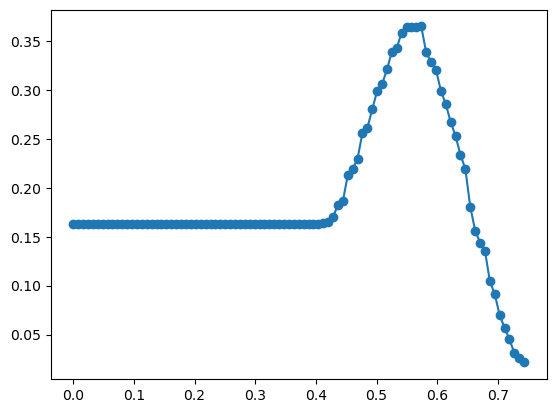

In [ ]:
thresh_l=np.linspace(0,0.8,100)
scores=[compute_scores(x_tra_scaled,w_opt.ravel(),y_tra,threshold=k,apply_sigmoid=True)[-1] for k in thresh_l]
plt.plot(thresh_l,scores,marker="o")

In [ ]:
w_opt.ravel()

array([ 0.09683529,  0.05118557,  0.01449744, -0.01574395,  0.08903431,
        0.07384216,  0.08631402])

### Submission

In [ ]:
from helpers import *

In [ ]:
def load_csv_data(data_path, sub_sample=False):
    """
    This function loads the data and returns the respectinve numpy arrays.
    Remember to put the 3 files in the same folder and to not change the names of the files.

    Args:
        data_path (str): datafolder path
        sub_sample (bool, optional): If True the data will be subsempled. Default to False.

    Returns:
        x_train (np.array): training data
        x_test (np.array): test data
        y_train (np.array): labels for training data in format (-1,1)
        train_ids (np.array): ids of training data
        test_ids (np.array): ids of test data
    """
    y_train = np.genfromtxt(
        os.path.join(data_path, "y_train.csv"),
        delimiter=",",
        skip_header=1,
        dtype=int,
        usecols=1,
    )
    x_train = np.genfromtxt(
        os.path.join(data_path, "x_train.csv"), delimiter=",", skip_header=1
    )
    x_test = np.genfromtxt(
        os.path.join(data_path, "x_test.csv"), delimiter=",", skip_header=1
    )

    train_ids = x_train[:, 0].astype(dtype=int)
    test_ids = x_test[:, 0].astype(dtype=int)
    x_train = x_train[:, 1:]
    x_test = x_test[:, 1:]

    # sub-sample
    if sub_sample:
        y_train = y_train[::50]
        x_train = x_train[::50]
        train_ids = train_ids[::50]

    return x_train, x_test, y_train, train_ids, test_ids


def create_csv_submission(ids, y_pred, name):
    """
    This function creates a csv file named 'name' in the format required for a submission in Kaggle or AIcrowd.
    The file will contain two columns the first with 'ids' and the second with 'y_pred'.
    y_pred must be a list or np.array of 1 and -1 otherwise the function will raise a ValueError.

    Args:
        ids (list,np.array): indices
        y_pred (list,np.array): predictions on data correspondent to indices
        name (str): name of the file to be created
    """
    # Check that y_pred only contains -1 and 1
    if not all(i in [-1, 1] for i in y_pred):
        raise ValueError("y_pred can only contain values -1, 1")

    with open(name, "w", newline="") as csvfile:
        fieldnames = ["Id", "Prediction"]
        writer = csv.DictWriter(csvfile, delimiter=",", fieldnames=fieldnames)
        writer.writeheader()
        for r1, r2 in zip(ids, y_pred):
            writer.writerow({"Id": int(r1), "Prediction": int(r2)})

In [ ]:
yb, input_data, ids=load_csv_data("data/x_test.csv")

In [ ]:
x_test=pd.read_csv("data/x_test.csv")

In [ ]:
for col in intresting_features:
    x_test[col].replace(dico_transfos[col],inplace=True)
x_test_cleaned=x_test.fillna(0)[intresting_features]


In [ ]:
x_test_scaled=(x_test_cleaned-np.mean(x_tra,axis=0)[None,:])/np.std(x_tra,axis=0)

In [ ]:
x_test_scaled.shape

(109379, 7)

In [ ]:
predictions=make_predictions(x_test_scaled,w_opt.ravel(),threshold=0.55,apply_sigmoid=True)

In [ ]:
predictions

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
predictions_df=pd.DataFrame({"Prediction":predictions,"Id":ids},columns=["Id","Prediction"])

In [ ]:
predictions_df.to_csv("predictions0.csv",index=False)

In [ ]:
create_csv_submission(ids,predictions,"predictions00.csv")

In [ ]:
ids.shape

(109379,)

In [ ]:
predictions=np.array([pred if pred==1 else -1 for pred in predictions])

In [ ]:
predictions.shape

(109379,)

In [ ]:
x_train, x_test, y_train, train_ids, test_ids=load_csv_data("data")

In [ ]:
create_csv_submission(test_ids,predictions,name="predictions000.csv")

In [ ]:
tr2=pd.read_csv("data/x_test.csv")

In [ ]:
x_test[0]

array([4.40000000e+01, 2.00000000e+00, 2.08201500e+06, 2.00000000e+00,
       8.00000000e+00, 2.01500000e+03, 1.10000000e+03, 2.01500028e+09,
       2.01500028e+09, 1.00000000e+00, 1.00000000e+00,            nan,
       1.00000000e+00, 1.00000000e+00,            nan, 1.00000000e+00,
       0.00000000e+00, 1.00000000e+00,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan, 2.00000000e+00, 8.80000000e+01,
       8.80000000e+01,            nan, 1.00000000e+00, 1.00000000e+00,
       2.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 2.00000000e+00,
       2.00000000e+00,            nan, 2.00000000e+00, 2.00000000e+00,
       2.00000000e+00, 2.00000000e+00, 2.00000000e+00, 2.00000000e+00,
       3.00000000e+00,            nan, 2.00000000e+00, 3.00000000e+00,
       6.00000000e+00, 1.00000000e+00, 2.00000000e+00,            nan,
      

In [ ]:
tr2.head()

,Id,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,328135,44,2,2082015,2,8,2015,1100,2015000284,2015000284,...,2,2,3.0,3.0,4.0,1,1,1.0,1.0,2.0
1,328136,27,1,1192015,1,19,2015,1100,2015008846,2015008846,...,2,2,3.0,3.0,4.0,1,1,NaN,NaN,2.0
2,328137,35,5,5262015,5,26,2015,1100,2015001230,2015001230,...,2,2,2.0,2.0,3.0,1,1,1.0,1.0,2.0
3,328138,23,2,2062015,2,6,2015,1100,2015000672,2015000672,...,4,2,2.0,2.0,3.0,1,1,1.0,1.0,2.0
4,328139,10,12,12202015,12,20,2015,1100,2015001727,2015001727,...,4,2,3.0,3.0,4.0,1,1,NaN,NaN,2.0


In [ ]:
pd.read_csv("data/x_test0.csv").head(2)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,44,2,2082015,2,8,2015,1100,2015000284,2015000284,1.0,...,2,2,3.0,3.0,4.0,1,1,1.0,1.0,2.0
1,27,1,1192015,1,19,2015,1100,2015008846,2015008846,NaN,...,2,2,3.0,3.0,4.0,1,1,NaN,NaN,2.0
